In [34]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [41]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
current_x = ctrl.Antecedent(np.arange(-1, 1, 0.01), 'current_x')
current_y = ctrl.Antecedent(np.arange(-1, 1, 0.01), 'current_y')
current_z = ctrl.Antecedent(np.arange(-2, 2, 0.01), 'current_z')
motor_z = ctrl.Consequent(np.arange(-1, 1, 0.01), 'motor_z')

motor_z.defuzzify_method = 'mom'

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
current_x['+present'] = fuzz.trapmf(current_x.universe, [-1, -1, -0.2, -0.1])
current_x['turned_off'] = fuzz.trimf(current_x.universe, [-0.2, 0, 0.2])
current_x['-present'] = fuzz.trapmf(current_x.universe, [0.1, 0.2, 1, 1])

current_y['+present'] = fuzz.trapmf(current_y.universe, [-1, -1, -0.2, -0.1])
current_y['turned_off'] = fuzz.trimf(current_y.universe, [-0.2, 0, 0.2])
current_y['-present'] = fuzz.trapmf(current_y.universe, [0.1, 0.2, 1, 1])


current_z['-overload'] = fuzz.trapmf(current_z.universe, [-2, -2, -1.7, -1.5])
current_z['-nominal'] = fuzz.trapmf(current_z.universe, [-1.7, -1.5, -0.5, -0.1])
current_z['turned_off'] = fuzz.trimf(current_z.universe, [-0.25, 0, 0.25])
current_z['+nominal'] = fuzz.trapmf(current_z.universe, [0.1, 0.5, 1.5, 1.7])
current_z['+overload'] = fuzz.trapmf(current_z.universe, [1.5, 1.7, 2, 2])

# Output membership functions 
motor_z['up'] = fuzz.trimf(motor_z.universe, [-1, -1, -0.3])
motor_z['set'] = fuzz.trimf(motor_z.universe, [-0.3, -0.2, -0.1])
motor_z['off'] = fuzz.trimf(motor_z.universe, [-0.1, 0, 0.1])
motor_z['down'] = fuzz.trimf(motor_z.universe, [0.1, 1, 1])


C:\Users\Sony\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Sony\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Sony\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


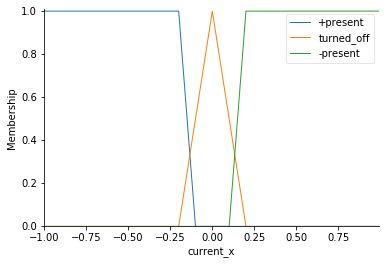

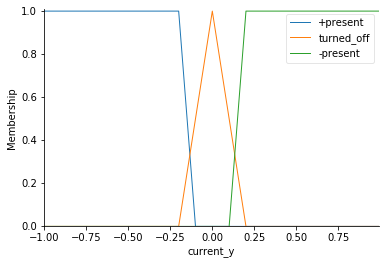

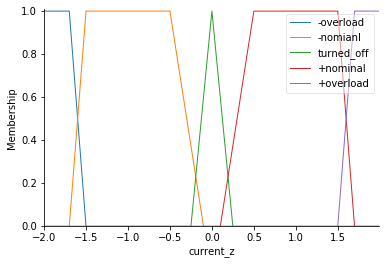

In [38]:
current_x.view()
current_y.view()
current_z.view()

C:\Users\Sony\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


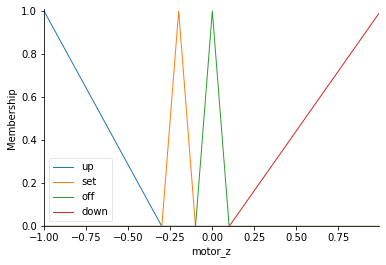

In [39]:
motor_z.view()

In [42]:
# Establish the rules for the system
rule1 = ctrl.Rule(current_x["-present"] & current_y["-present"] & current_z["turned_off"], motor_z["off"])   
rule2 = ctrl.Rule(current_x["-present"] & current_y["+present"] & current_z["turned_off"], motor_z["off"])   
rule3 = ctrl.Rule(current_x["-present"] & current_y["turned_off"] & current_z["turned_off"], motor_z["off"])   
rule4 = ctrl.Rule(current_x["+present"] & current_y["-present"] & current_z["turned_off"], motor_z["off"])   
rule5 = ctrl.Rule(current_x["+present"] & current_y["turned_off"] & current_z["turned_off"], motor_z["off"])   
rule6 = ctrl.Rule(current_x["+present"] & current_y["+present"] & current_z["turned_off"], motor_z["off"])   
rule7 = ctrl.Rule(current_x["turned_off"] & current_y["turned_off"] & current_z["turned_off"], motor_z["down"])   
rule8 = ctrl.Rule(current_x["turned_off"] & current_y["turned_off"] & current_z["+overload"], motor_z["up"])   
rule9 = ctrl.Rule(current_x["turned_off"] & current_y["turned_off"] & current_z["+nominal"], motor_z["down"])   
rule10 = ctrl.Rule(current_x["turned_off"] & current_y["turned_off"] & current_z["-nominal"], motor_z["up"])   
rule11 = ctrl.Rule(current_x["turned_off"] & current_y["turned_off"] & current_z["-overload"], motor_z["set"])   


In [44]:
z_motion_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, 
                                       rule6, rule7, rule8, rule9, rule10,
                                      rule11])
z_motion = ctrl.ControlSystemSimulation(z_motion_control)

In [51]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
z_motion.input['current_x'] = 0.5
z_motion.input['current_y'] = 1
z_motion.input['current_z'] = 0
# Crunch the numbers
z_motion.compute()

C:\Users\Sony\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


8.882940679318571e-16


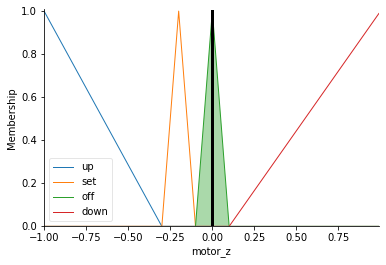

In [52]:
motor_z.view(sim=z_motion)
print(z_motion.output['motor_z'])